In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel(r"C:\Users\PC\Desktop\TSLA price prediction.xlsx")

In [3]:
df.shape

(1256, 6)

In [4]:
df.head(1256)

Date        Open        High         Low       Close  \
0    2021-01-25 14:30:00  285.000000  300.133331  279.606659  293.600006   
1    2021-01-26 14:30:00  297.126678  298.633331  290.533325  294.363342   
2    2021-01-27 14:30:00  290.116669  297.166656  286.220001  288.053345   
3    2021-01-28 14:30:00  273.333344  282.666656  267.000000  278.476654   
4    2021-01-29 14:30:00  276.666656  280.803345  260.033325  264.510010   
...                  ...         ...         ...         ...         ...   
1251 2026-01-16 14:30:00  439.500000  447.250000  435.260010  437.500000   
1252 2026-01-20 14:30:00  429.359985  430.730011  417.440002  419.250000   
1253 2026-01-21 14:30:00  421.660004  438.200012  419.619995  431.440002   
1254 2026-01-22 14:30:00  435.160004  449.500000  432.630005  449.359985   
1255 2026-01-23 14:30:00  447.429993  452.429993  444.040009  449.059998   

         Volume  
0     123520200  
1      69394800  
2      82002000  
3      79134000  
4     104972400  
...         ...  
1251   60220600  
1252   63187300  
1253   68124000  
1254   71546700  
1255   56636400  

[1256 rows x 6 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1256 non-null   datetime64[ns]
 1   Open    1256 non-null   float64       
 2   High    1256 non-null   float64       
 3   Low     1256 non-null   float64       
 4   Close   1256 non-null   float64       
 5   Volume  1256 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.0 KB


In [6]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(columns=['Date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 49.2 KB


Features(X) and Target(Y)

In [9]:
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']


Train / Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42,shuffle=False)


Model Training

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Prediction

In [12]:
y_pred = model.predict(x_test)


Model_Evaluation

In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE :", mae)
print("R² Score:", r2)


RMSE: 4.183949443351878
MAE : 3.316511088731336
R² Score: 0.9965708559304292


Actual vs Predicted Plot

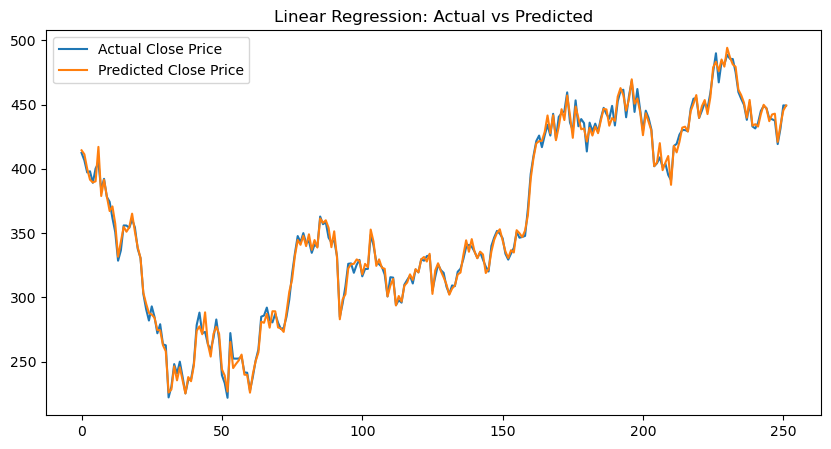

In [14]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.legend()
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


The graph compares actual and predicted closing prices of Tesla stock. The predicted values closely follow the actual prices, showing that the model has learned the overall trend and movement of the stock. However, the predictions are not exactly identical to the real values, which indicates that the model is generalizing well rather than memorizing the data. This confirms that the model provides realistic and reliable predictions.

In [17]:
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})

coeff_df

Feature   Coefficient
0    Open -6.690037e-01
1    High  8.089576e-01
2     Low  8.621652e-01
3  Volume  3.253837e-09

The regression coefficients show that the daily high and low prices have the strongest positive influence on Tesla’s closing price, while the opening price has a slight negative relationship. Trading volume has a relatively small impact due to its large scale but still contributes positively to price movement.